In [0]:
# Load dataset and split train/test
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

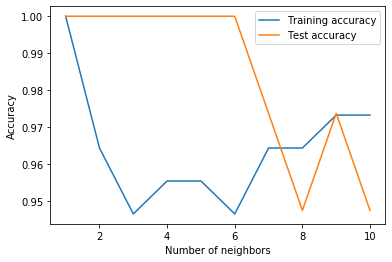

In [0]:
# K-Nearest Neighbors: Test number of neighbors from 1 to 10
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

def plotNumNeighborsVsAccuracy(p_value=2):
  training_accuracy = []
  test_accuracy = []
  neighbor_settings = range(1, 11)
  for curKvalue in neighbor_settings:
    # Build Model
    clf = KNeighborsClassifier(n_neighbors=curKvalue, p=p_value) # Fill in parameters
    clf.fit(X_train, y_train)

    # Test model on training data
    cur_train_accuracy = clf.score(X_train, y_train)
    training_accuracy.append(cur_train_accuracy)

    #Test model on the test data
    cur_test_accuracy = clf.score(X_test, y_test)
    test_accuracy.append(cur_test_accuracy)
  
  plt.plot(neighbor_settings, training_accuracy, label="Training accuracy")
  plt.plot(neighbor_settings, test_accuracy, label="Test accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Number of neighbors")
  plt.legend()

plotNumNeighborsVsAccuracy(2)

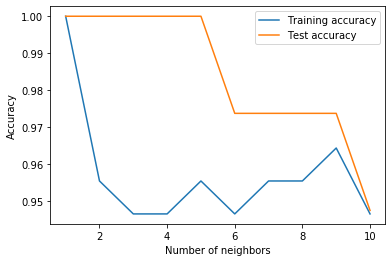

In [0]:
plotNumNeighborsVsAccuracy(p_value=1)

In [0]:
# Train a decision tree model
from sklearn.tree import DecisionTreeClassifier

tree_giniIndex = DecisionTreeClassifier()
tree_giniIndex.fit(X_train, y_train)

tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

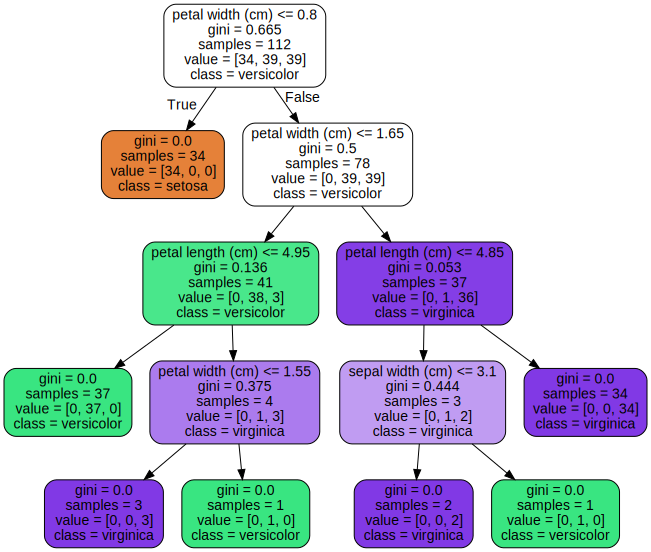

In [0]:
# Visualize the tree
from sklearn import tree
import graphviz

%matplotlib inline
dot_data = tree.export_graphviz(tree_giniIndex, out_file=None, feature_names = iris_dataset.feature_names, class_names = iris_dataset.target_names, filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

In [0]:
# Evaluate the decision tree model
from sklearn import metrics
y_predicted = tree_giniIndex.predict(X_test)

print(metrics.classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

